In [23]:
import pandas as pd

churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Задание 9.1 Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

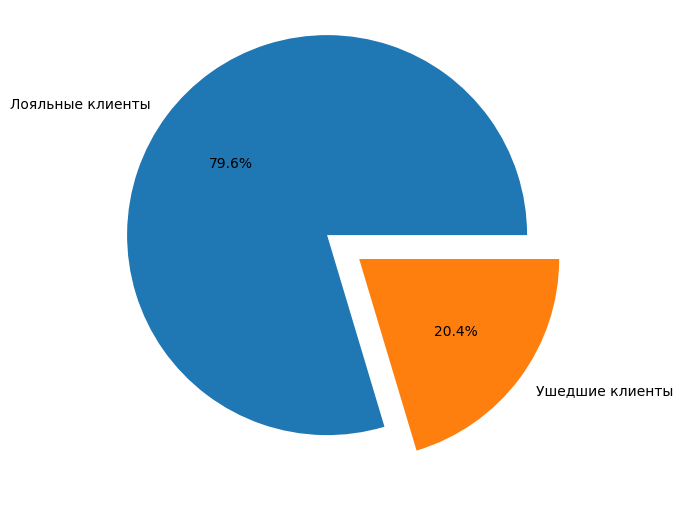

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

exited = churn_data["Exited"].value_counts()

fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    exited,
    labels=["Лояльные клиенты", "Ушедшие клиенты"],
    autopct='%.1f%%',
    explode = [0.2, 0]);

In [187]:
#Из графика видно что количество лояльных клиентов превышает количество ушедших более чем в 3 раза.

Задание 9.2 Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


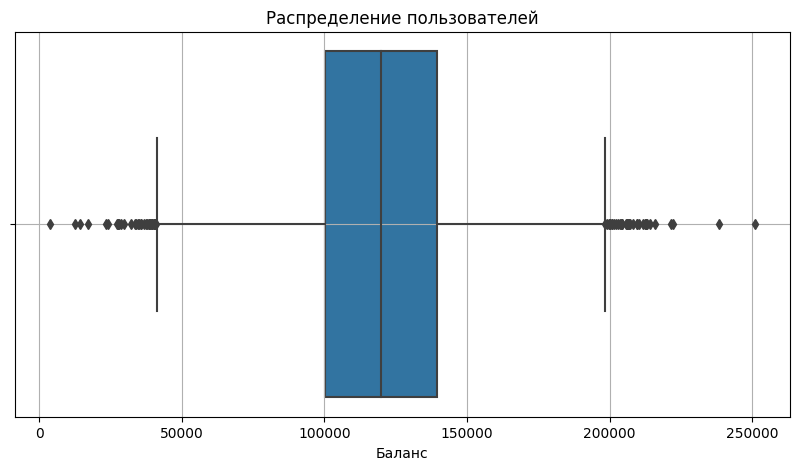

In [25]:
import seaborn as sns

Customer = churn_data[churn_data['Balance']>2500] # убираем не интересующие данные
display(Customer)

fig=plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(data = Customer,
                      x="Balance",
                      orient='h',
                      width=0.9)
boxplot.set_title("Распределение пользователей")
boxplot.set_xlabel("Баланс")
boxplot.grid()

In [4]:
#Распределение показывает что большинство пользователей имеют на счету более 100000 и немногим менее 150000. Среднее же значение баланса составляет порядка 120000.

Задание 9.3 Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

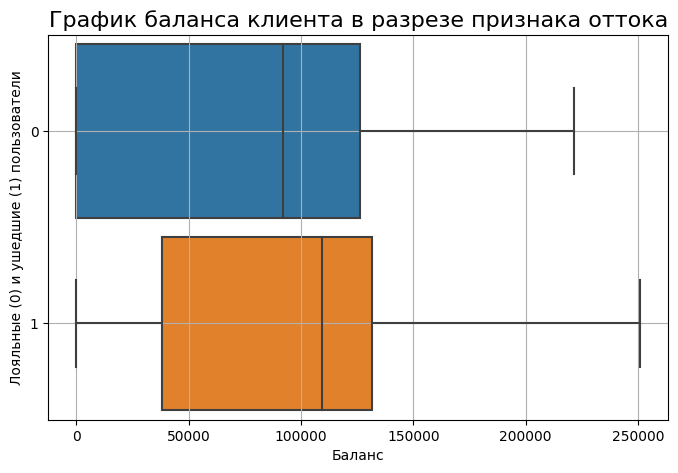

In [26]:
fig = plt.figure(figsize=(8, 5))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('График баланса клиента в разрезе признака оттока', fontsize=16);
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Лояльные (0) и ушедшие (1) пользователи');
boxplot.grid()

In [135]:
#График показывает что средняя сумма на счету ушедших клиентов (1) больше чем на счету лояльных клиентов (0).
#Так же минимальный размер средств на счету ушедших клиентов гораздо выше чем у лояльных, поэтому на более
#выгодных условиях сбережения этих средств такие клиенты могли бы стать лояльными. Лояльные же клиенты обладая
#незначительным размером средств на счету с удовольствием пользуются продуктами банка. 

Задание 9.4 Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

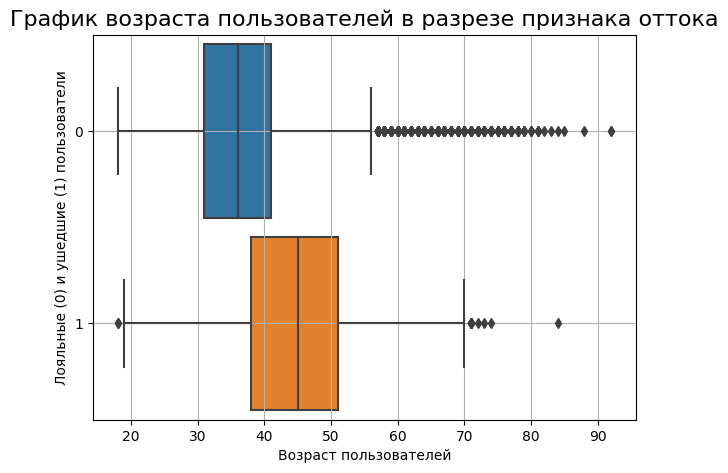

In [27]:
fig = plt.figure(figsize=(7, 5))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('График возраста пользователей в разрезе признака оттока', fontsize=16);
boxplot.set_xlabel('Возраст пользователей');
boxplot.set_ylabel('Лояльные (0) и ушедшие (1) пользователи');
boxplot.grid()

In [53]:
#Большинство лояльных клиентов (0) относятся к возрастной группе от 30 до 40 лет, со средним значением порядка 36 лет.
#Так же начиная с пятидесяти пяти летнего возраста в этой группе появляется большое количество потенциальных выбросов.

Задание 9.5 Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [82]:
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"

fig = px.scatter(
    churn_data,
    x="CreditScore",
    y="EstimatedSalary",
    color="Exited",
    title="Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты"
)
fig.show()

In [142]:
#Из графика хорошо видно что на границах значений оси Х расположились ушедшие и лояльные клиенты.
#Чем ниже оказывался кредитный рейтинг, тем чаще уходили клиенты и наоборот - при высоком рейтинге
#все клиенты выделены синим цветом т.е их значение равно 0 в столбце Exited - они являются лояльными клиентами.
#Также плотность рапределения показывает что кредитный рейтинг находится в пределах 500 - 800 для большинства
#клиентов имеющих заработную плату от порядка 5 до 195 тысяч т.е люди независимо от величины заработной платы
#стараются иметь свою кредитную историю положительной.

In [47]:
pio.renderers

Renderers configuration
-----------------------
    Default renderer: 'browser'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

In [ ]:
import plotly
import cufflinks as cf
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "notebook_connected"

cf.go_offline()

Задание 9.6 Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [73]:
#сгруппируем данные,  по гендерному признаку, а также по признаку лояльности укажем количество клиентов
grouped_row = churn_data.groupby(['Gender', 'Exited'], as_index=False)['CustomerId'].count()

#и теперь уже можно строить px.bar() , передаем данные
fig = px.bar(
    data_frame=grouped_row, 
    x="Gender", 
    y="CustomerId", 
    color='Exited', 
    orientation='v', 
    height=500, 
    width=550, 
    title='Зависимость ушедших и оставшихся клиентов от пола', 
    barmode = 'group',
)
fig.show()

In [15]:
#В результате анализа графика можно сделать вывод что женщин ушло больше чем мужчин, мужчины же наоборот
#более лояльны, поэтому вероятнее что женщины уходят чаще мужчин.

Задание 9.7 Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

,NumOfProducts,Exited,CustomerId
0,1,0,3675
1,1,1,1409
2,2,0,4242
3,2,1,348
4,3,0,46
5,3,1,220
6,4,1,60


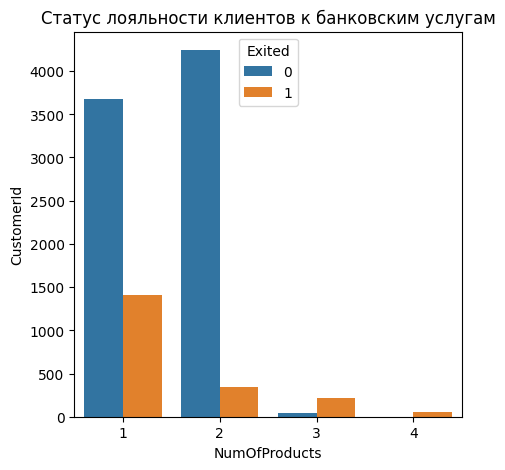

In [31]:
grouped_row = churn_data.groupby(['NumOfProducts', 'Exited'], as_index=False)['CustomerId'].count()
display(grouped_row)

#строим диаграмму
fig = plt.figure(figsize=(5, 5))
barplot = sns.barplot(
    data=grouped_row,
    x='NumOfProducts',
    y='CustomerId',
    hue='Exited',
    orient='v'
)
barplot.set_title('Статус лояльности клиентов к банковским услугам');

In [195]:
#Банковские услуги под номерами 3 и 4 вызывают больший отток клиентов. Услуги же под номерами 1 и 2 наоборот
#привлекают клиентов и ими охотно пользуются.

Задание 9.8 Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

,IsActiveMember,Exited,CustomerId
0,0,0,3547
1,0,1,1302
2,1,0,4416
3,1,1,735


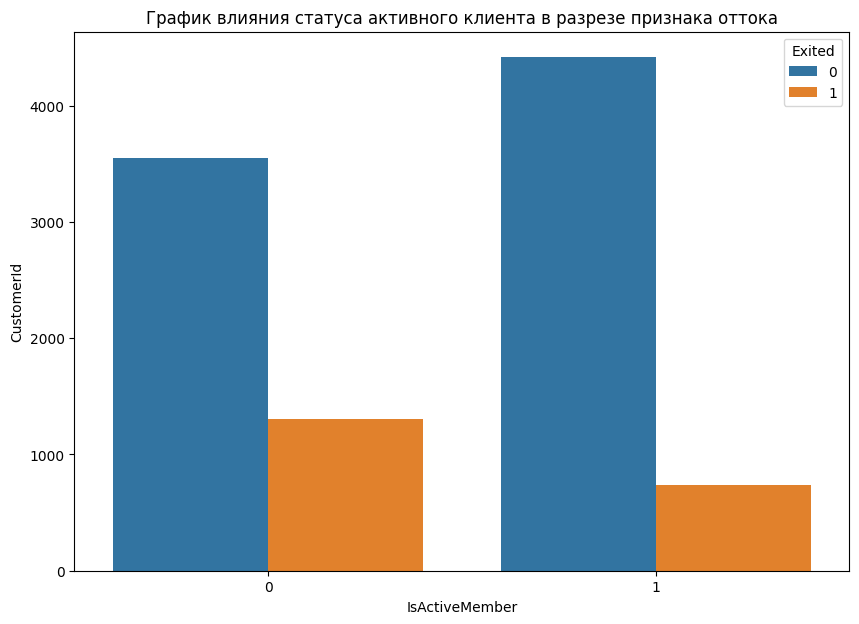

In [32]:
grouped_row = churn_data.groupby(['IsActiveMember', 'Exited'], as_index=False)['CustomerId'].count()
display(grouped_row)

fig = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data=grouped_row,
    x='IsActiveMember',
    y='CustomerId',
    hue='Exited',
)
barplot.set_title('График влияния статуса активного клиента в разрезе признака оттока');

In [50]:
#В результате анализа полученных графиков можно сделать вывод что наименьший отток наблюдается среди 
#активных клиентов. Среди неактивных клиентов величина оттока значительно больше, в порядка полутора раз.
#Тем самым можно порекомендовать банку увеличить активность клиентов для получения наименьшей величины оттока.

Задание 9.9 В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [74]:
new_data = churn_data.groupby('Geography', as_index=False)['Exited'].mean()
display(new_data)

fig = px.choropleth(
    data_frame=new_data, #DataFrame
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 0.4], #диапазон цвета
    title='Распределение оттока клиентов по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем график
fig.show()

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


In [60]:
#Доля ушедших клиентов больше в Германии. Это может быть связано с тем, что большинство из клиентов
#этой страны - женщины с низким кредитным рейтингом.

Задание 9.10 Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,11,20,14,17,12,21,21,12,20,26,13
Fair,20,47,49,50,43,48,52,45,51,42,23
Good,32,79,74,76,72,83,64,71,55,73,36
Poor,24,69,54,52,59,47,43,36,53,58,20
Very_Poor,8,17,10,18,17,10,16,13,18,14,9


Text(0.5, 1.0, 'Тепловая карта оттока клиентов')

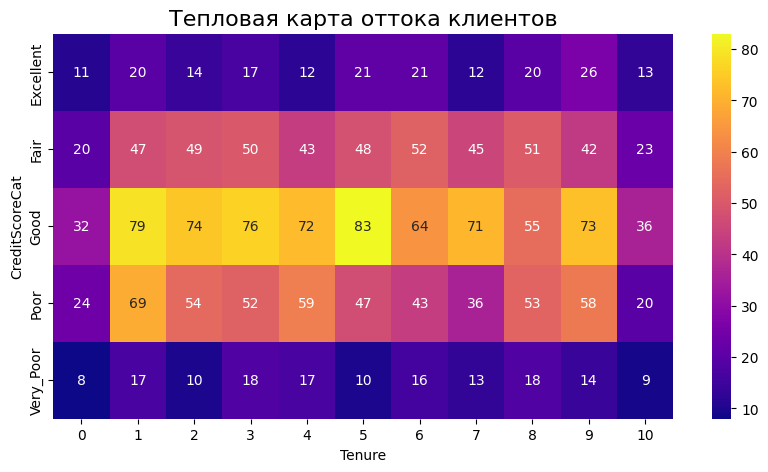

In [34]:
def get_credit_score_cat(CreditScore):
    if CreditScore >= 300 and CreditScore < 500:
        return "Very_Poor"
    elif CreditScore >= 500 and CreditScore < 601:
        return "Poor"
    elif CreditScore >= 601 and CreditScore < 661:
        return "Fair"
    elif CreditScore >= 661 and CreditScore < 781:
        return "Good"
    elif CreditScore >= 781 and CreditScore < 851:
        return "Excellent"
    elif CreditScore >= 851:
        return "Top"
    elif CreditScore < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
filtered = churn_data[churn_data['Exited'] == 1].copy()

pivot_1=filtered.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='count'
)
pivot_1=pivot_1.fillna(0)
display(pivot_1)

fig = plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(data=pivot_1, annot=True, cmap='plasma')
heatmap.set_title('Тепловая карта оттока клиентов', fontsize=16)


In [40]:
#На полученной тепловой карте зависимости оттока клиентов от категории кредитного рейтинга и времени 
#в течение которого клиент пользовался услугами банка - видно, что на границах кредитного рейтинга
#(категории Very_Poor и Excellent) количество ушедших клиентов - минимально. И по мере приближения 
#кредитного рейтинга к его среднему значению (Good) - количество ушедших клиентов - возрастает, достигая
#максимальных значений в категории Good. Причем количество лет, в течение которых клиент пользовался
#услугами банка для данной категории ушедших клиентов имеет значение также только на его границах
#(0 и 10 лет - клиенты уходят реже), а в остальных случаях не влияет на решение клиента уйти.